# First "complete" analysis of the results for the k technique (AUC-PR)

## Setup

### Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Paths

In [3]:
csv_dir = '/home/sylli/Documents/MSAD-E/reports/results_04_2024'
save_fig_path = os.path.join(csv_dir, "figures")

### Variables

In [4]:
# Detectors
detector_names = [
	'AE', 
	'CNN', 
	'HBOS', 
	'IFOREST', 
	'IFOREST1', 
	'LOF', 
	'LSTM', 
	'MP', 
	'NORMA', 
	'OCSVM', 
	'PCA', 
	'POLY'
]

model_selectors = [
    "resnet1024",
    "convnet128",
    "sit512",
]

combine_methods = ['average', 'vote']

dataset_names = [
    'MGAB', 
    'GHL', 
    'MITDB', 
    'Genesis', 
    'OPPORTUNITY', 
    'SensorScope', 
    'KDD21', 
    'Occupancy', 
    'SVDB', 
    'IOPS', 
    'SMD', 
    'Daphnet',
    'ECG',
    'NAB',
    'YAHOO'
]

k_values = np.arange(1, 13)

## Helper functions

In [43]:
def load_results(csv_file):
    """Load results from a CSV file."""
    return pd.read_csv(csv_file, index_col=0)

def create_k_plot(results):
    """Plot results."""
    results_df.plot(kind='bar', rot=0)
    plt.xlabel('Combine Method')
    plt.ylabel('Metric Value')
    plt.title('Comparison of Combine Methods')
    plt.legend(title='k')
    plt.show()

## Load the data

### Read file names

In [102]:
result_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]
for i in np.random.randint(low=0, high=len(result_files), size=3):
    print(result_files[i])

YAHOO_resnet1024_average_k9.csv
IOPS_convnet128_average_k9.csv
OPPORTUNITY_sit512_average_k4.csv


### Load all the data and create DataFrame

In [57]:
all_results = []

for file in result_files:
    parts = file.split('_')

    if len(parts) != 4:
        print("STOP! THERE IS A MISTAKE WITH GROUPING THE FILES. FILE NAME HAS PROBABLY CHANGED. TAKE CARE")
    else:
        dataset = parts[0]
        model_selector = parts[1]
        combine_method = parts[-2]
        k = int(parts[-1].split('.')[0][1:])
        if (dataset not in dataset_names) or \
        (model_selector not in model_selectors) or \
        (combine_method not in combine_methods) or \
        (k not in k_values):
            print("STOP! THERE IS A MISTAKE WITH GROUPING THE FILES. FILE NAME HAS PROBABLY CHANGED. TAKE CARE")
            break
        else:
            curr_df = pd.read_csv(os.path.join(csv_dir, file))
            curr_df.rename(columns={'Unnamed: 0': 'Time series'}, inplace=True)
            curr_df['Model Selector'] = model_selector
            curr_df['k'] = k
            curr_df['Combine Method'] = combine_method
            curr_df['Dataset'] = dataset
            all_results.append(curr_df)
df = pd.concat(all_results)
df.head(5)

,Time series,AUC-PR,Model Selector,k,Combine Method,Dataset
0,OPPORTUNITY/S4-ADL2.test.csv@120.out,0.627780,convnet128,4,vote,OPPORTUNITY
1,OPPORTUNITY/S4-ADL5.test.csv@54.out,0.440608,convnet128,4,vote,OPPORTUNITY
2,OPPORTUNITY/S1-ADL2.test.csv@103.out,0.910242,convnet128,4,vote,OPPORTUNITY
3,OPPORTUNITY/S2-ADL1.test.csv@124.out,0.379734,convnet128,4,vote,OPPORTUNITY
4,OPPORTUNITY/S4-ADL3.test.csv@53.out,0.088045,convnet128,4,vote,OPPORTUNITY


## Analysis

### Comparing different values of k

In [103]:
# Example usage
model_selector = 'sit512'
combine_method = 'average'
dataset = 'YAHOO'  # Replace with your dataset name

tmp_df = df[(df["Model Selector"] == model_selector) & (df["Combine Method"] == combine_method)]

IndexError: list index out of range

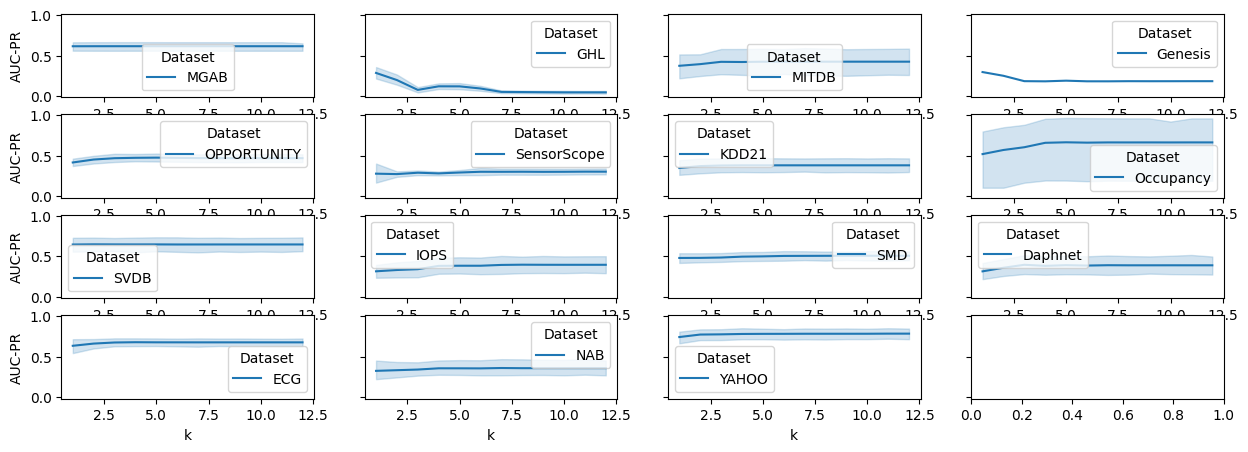

In [118]:
# Plot the AUC-PR values
fig, axes = plt.subplots(4, 4, figsize=(15, 5), sharey=True)

for i in range (0, 16):
    sns.lineplot(ax=axes[i//4, i % 4], data=tmp_df[tmp_df["Dataset"] == dataset_names[i]], x="k", y="AUC-PR", hue="Dataset")
plt.show()